# Problems 6-8

## John Wilson

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Problem 6

In [32]:
df = pd.read_csv('weather.csv',header=0)
df["DATE"].apply(str)
df["DATE"]=pd.to_datetime(df["DATE"],format="%Y%m%d")
#df1=df.drop("STATION",axis=1)
missing=(df[df["TMIN"]==-9999]).index[0]
df["TMIN"][missing]=df["TMIN"][missing+1]

chi=df.iloc[-3790:]
df=df.drop(df.index[-3790:])

df["DOY"]=pd.DatetimeIndex(df["DATE"]).dayofyear
chi["DOY"]=pd.DatetimeIndex(chi["DATE"]).dayofyear
#Standardizing dates to begin at Autumn
df['newDOY']=(df["DOY"]-264)%366
chi['newDOY']=(chi["DOY"]-264)%366

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


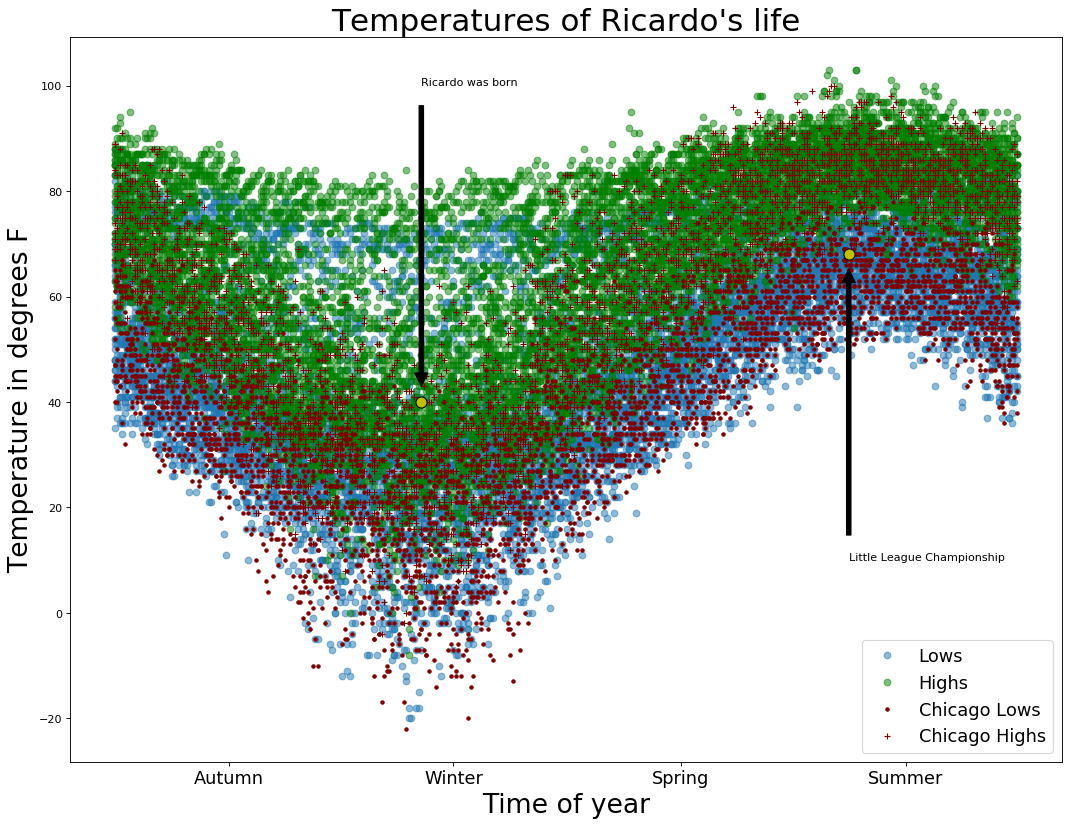

In [61]:
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
mins = np.array(df["TMIN"])
maxs = np.array(df["TMAX"])
days = np.array(df["newDOY"])

cmins = np.array(chi["TMIN"])
cmaxs = np.array(chi["TMAX"])
cdays = np.array(chi["newDOY"])


xtickvals=[46,137,229,320]
xticklabs=['Autumn','Winter','Spring','Summer']
plt.xticks(xtickvals,xticklabs,rotation='horizontal',size='16')
plt.plot(days,mins,'o',alpha=0.5,label='Lows')
plt.plot(days, maxs, 'o',color='green',alpha=0.5,label='Highs')
plt.plot(cdays, cmins, '.', color="#800000", label="Chicago Lows")
plt.plot(cdays, cmaxs, '+', color="#800000", label="Chicago Highs")
plt.xlabel("Time of year",size='24')
plt.ylabel("Temperature in degrees F",size='24')
plt.legend(loc='lower right',fontsize='16')
plt.title("Temperatures of Ricardo's life",fontsize='28')
plt.plot(124,40,'o',color='y',fillstyle='full',markersize=10,\
         markeredgecolor='k',markeredgewidth=1)
plt.annotate('Ricardo was born', xy=(124, 40), xytext=(124, 100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot(297,68,'o',color='y',fillstyle='full',markersize=10,\
         markeredgecolor='k',markeredgewidth=1)
plt.annotate('Little League Championship', xy=(297, 68), xytext=(297, 10),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

Note I varied a little from the color scheme described in the problem set to enhance visibility.

### Problem 7

In [78]:
lipids = pd.read_csv('lipids.csv',skiprows=4,header=0)

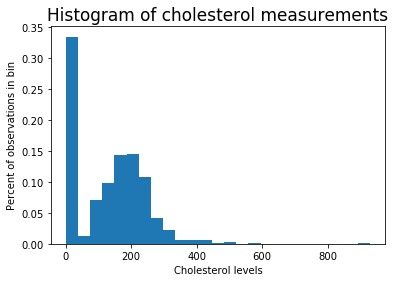

In [81]:
lipids_all = lipids.stack()
num_bins = 25
weights = (1 / lipids_all.shape[0]) * np.ones_like(lipids_all)
n, bin_cuts, patches = plt.hist(lipids_all, num_bins, weights=weights)
plt.title('Histogram of cholesterol measurements', fontsize=17)
plt.xlabel(r'Cholesterol levels')
plt.ylabel(r'Percent of observations in bin')

plt.show()

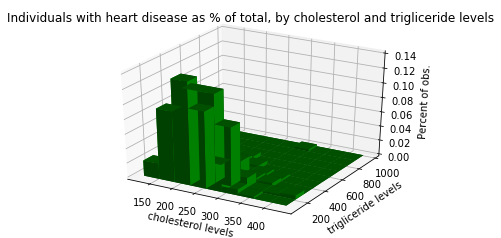

In [83]:
dur_t = lipids['chol']
dur_tp1 = lipids['trig']

from mpl_toolkits.mplot3d import Axes3D

'''
--------------------------------------------------------------------
bin_num  = integer > 2, number of bins along each axis
hist     = (bin_num, bin_num) matrix, bin percentages
xedges   = (bin_num+1,) vector, bin edge values in x-dimension
yedges   = (bin_num+1,) vector, bin edge values in y-dimension
x_midp   = (bin_num,) vector, midpoints of bins in x-dimension
y_midp   = (bin_num,) vector, midpoints of bins in y-dimension
elements = integer, total number of 3D histogram bins
xpos     = (bin_num * bin_num) vector, x-coordinates of each bin
ypos     = (bin_num * bin_num) vector, y-coordinates of each bin
zpos     = (bin_num * bin_num) vector, zeros or z-coordinates of
            origin of each bin
dx       = (bin_num,) vector, x-width of each bin
dy       = (bin_num,) vector, y-width of each bin
dz       = (bin_num * bin_num) vector, height of each bin
--------------------------------------------------------------------
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = int(9)
hist, xedges, yedges = np.histogram2d(dur_t, dur_tp1, bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('cholesterol levels')
ax.set_ylabel('trigliceride levels')
ax.set_zlabel('Percent of obs.')
plt.title('Individuals with heart disease as % of total, by cholesterol and trigliceride levels')
plt.show()

An initial guess is that people with low cholesterol and low trigliceride have greater risk.

### Problem 8

In [4]:
from pandas_datareader import data
import datetime
from matplotlib.ticker import MultipleLocator

In [5]:
start= datetime.datetime(1929, 1, 1)
end= datetime.datetime(2016,10,1)
rec = data.DataReader("USREC", "fred", start, end)

In [6]:
temp=pd.read_csv("payems.csv",skiprows=5,header=0)
temp['date']=pd.to_datetime(temp['date'])
rec["DATE"]=rec.index
x=temp.iloc[0]["payems"]*np.ones(12)
for i in range(1,10):
    x=np.append(x,temp.iloc[i]["payems"]*np.ones(12))
for i in range(0,10):
    temp=temp.drop(i)

rng=pd.date_range('12/31/1928',periods=120,freq='MS',closed='right')
temp1=pd.Series(x,index=rng).to_frame().reset_index()
temp1['DATE']=temp1['index']
temp1=temp1.drop('index',axis=1)
temp1["payems"]=temp1[0]
temp1=temp1.drop(0,axis=1)
temp['DATE']=temp['date']
temp=temp.drop("date",axis=1)
result=pd.concat([temp1,temp])
result=result.merge(rec)

In [7]:
first = False
begin=np.empty(0)
end=np.empty(0)
for i in range(len(result)):
    if result.iloc[i]["USREC"] == 1:
        if first == False:
            begin=np.append(begin,i)
            first = True
            end=np.append(end,i)
    else:
        first = False
#begin-=12
end+=84

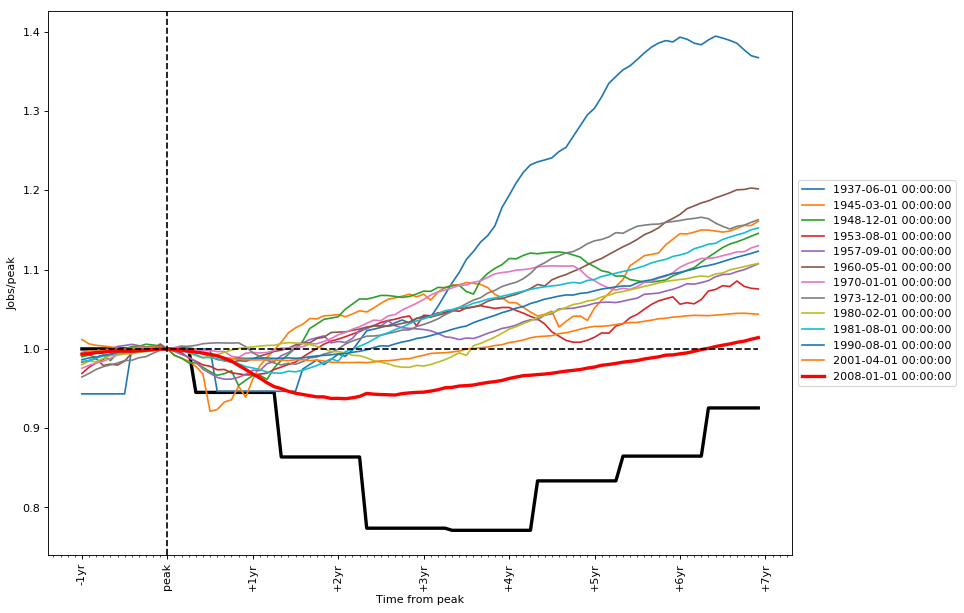

In [69]:
fig, ax = plt.subplots(figsize=(12, 9), dpi= 80, facecolor='w', edgecolor='k')
init=[result.iloc[0]["payems"]]
dep=np.append(4*init,result.iloc[0:int(end[0])]["payems"])/init[0]
plt.plot(dep,'k',linewidth=3)
for i in range(1,len(begin)):
    curr = result.iloc[int(begin[i])]['payems']
    vals = np.array(result.iloc[int(begin[i])-12:int(end[i])]['payems'])/curr
    if i == len(begin)-1:
        plt.plot(vals,'r',linewidth=3,label=result.iloc[int(begin[i])]['DATE'])
    else:
        plt.plot(vals,label=result.iloc[int(begin[i])]['DATE'])
    
minorLocator=MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
xtickvals=[0,12,24,36,48,60,72,84,96]
xticklabs=['-1yr','peak','+1yr','+2yr','+3yr','+4yr','+5yr','+6yr','+7yr']
plt.xticks(xtickvals,xticklabs,rotation='vertical')
plt.xlabel("Time from peak")
plt.ylabel("Jobs/peak")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([1]*96,'k--')
plt.axvline(x=12,color='k',linestyle='--')

plt.show()

Note that the graph for the year of the great depression is a step function because only annual data is available.

It looks like the Great Recession was the worst for job loss overall, besides the Great Depression. One recession lost more jobs quickly but recovered soon. One way in which the Great Recession may have been worse is a slower recovery.